# import dependencies

In [3]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
ENVIRONMENTAL JUSTICE - HOUSEHOLD ENERGY AND TRANSPORTATION BURDEN <br>
https://maps.nrel.gov/slope/data-viewer?filters=%5B%5D&layer=eej.household-energy-burden&year=2020&res=tracts <br>
Household Energy and Transportation Burden Data Description
Household energy and transportation burden data are combined from two sources. For housing energy burden, energy bills that consume more than 6% of a single household’s income are defined to constitute a high energy burden by the 2020 ACEEE Report How High Are Household Energy Burdens? Housing energy burdens of 6% or greater are binned into the highest energy burden bin. The low and medium bins are then divided equally across the remainder of the country. For transportation burden, three equal quantiles are mapped.

1. Housing energy burden data comes from the Low-income Energy Affordability Data (LEAD) Tool, developed by the U.S. Department of Energy and National Renewable Energy Laboratory

Energy burden is defined as the average annual housing energy costs divided by the average annual household income. Monthly housing energy costs are based on household monthly expenditures for electricity, gas (utility and bottled), and other fuels (including fuel oil, wood, etc.). For further data exploration visit the LEAD Tool.

2. Transportation energy burden data comes from the Affordability of Household Transportation Fuel Costs by Region and Socioeconomic Factors 2021 report, conducted by Argonne National Laboratory.

Transportation energy burden is defined as the percentage of annual household income spent on the household vehicle fuel costs (excludes public transit). Transportation burden is calculated for every census tract in the U.S. by combining three metrics (annual household vehicle miles traveled, stock-weighted miles per gallon, and fuel price) with tract-level income data. The Argonne study provides a finer understanding of the spatial variation in household transportation energy burden by connecting VMT, vehicle fuel economy, fuel costs, and income data at the census tract level.

In [4]:
burden_data_path = ".\data\household_energy_burden_baseline\household_energy_burden_baseline_tracts.csv"
df_burden = pd.read_csv(burden_data_path)
df_burden.head()

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
0,G01133965700,0.030750,0.0553
1,G01133965503,0.030264,0.0758
2,G01133965502,0.046644,0.0742
3,G01131035200,0.038904,0.0990
4,G01131035100,0.036439,0.0592


In [5]:
df_burden.shape

(73105, 3)

In [6]:
lead_data_path = ".\data\lead-tool-map-data.csv"
df_lead = pd.read_csv(lead_data_path)
df_lead.head()

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
0,48001950401,"Census Tract 9504.01, Anderson County, Texas",False,1.0,1083.0,81.0,76260.0,38.0,0.0,0.0,0.0,23.0,31.0,7.0,1.0,0.0,14.0,46.0,41.0
1,48001950402,"Census Tract 9504.02, Anderson County, Texas",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48001950901,"Census Tract 9509.01, Anderson County, Texas",True,3.0,1931.0,1789.0,56468.0,10.0,1.0,0.0,0.0,11.0,73.0,3.0,1.0,9.0,40.0,39.0,13.0
3,48001951100,"Census Tract 9511, Anderson County, Texas",False,3.0,1928.0,1841.0,68871.0,7.0,0.0,3.0,0.0,8.0,77.0,4.0,0.0,8.0,40.0,37.0,15.0
4,48009020200,"Census Tract 202, Archer County, Texas",False,3.0,2260.0,1024.0,65718.0,0.0,3.0,0.0,0.0,4.0,90.0,3.0,1.0,13.0,42.0,28.0,16.0


In [7]:
path_dfw = "../supervised_version/acs5_dfw_df.pkl"
with open(path_dfw, 'rb') as file:
    df_dfw = pkl.load(file)

In [8]:
df_dfw.head()

,tract,GEO_ID,NAME,state,county,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,...,B15003_016E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E
0,31328,1400000US48085031328,"Census Tract 313.28, Collin County, Texas",48,85,3949,2088,131,0,1698,...,67,103,83,203,168,142,951,365,63,15
1,113403,1400000US48439113403,"Census Tract 1134.03, Tarrant County, Texas",48,439,2926,2569,124,0,5,...,162,339,105,176,303,117,415,227,10,40
2,16415,1400000US48113016415,"Census Tract 164.15, Dallas County, Texas",48,113,4651,2228,1039,0,232,...,42,345,40,399,275,303,979,363,0,66
3,113936,1400000US48439113936,"Census Tract 1139.36, Tarrant County, Texas",48,439,5468,3757,616,0,141,...,120,512,96,217,503,242,1153,593,101,86
4,17201,1400000US48113017201,"Census Tract 172.01, Dallas County, Texas",48,113,5936,3235,967,299,26,...,133,681,199,216,168,289,84,18,14,0


In [9]:
df_dfw.GEO_ID.shape, df_burden["Geography ID"].shape, df_lead["Geography ID"].shape

((1704,), (73105,), (1911,))

In [10]:
dfw_geo_id = df_dfw["GEO_ID"].apply(lambda s: s.split("US")[1]).tolist()
len(dfw_geo_id), len(dfw_geo_id[0])

(1704, 11)

In [11]:
df_burden["Geography ID"] = df_burden["Geography ID"].apply(lambda s: s.split("G")[-1])

In [12]:
df_burden["Geography ID"]

0        01133965700
1        01133965503
2        01133965502
3        01131035200
4        01131035100
            ...     
73100    56025001800
73101    56025000502
73102    56023978400
73103    56029965200
73104    56029965400
Name: Geography ID, Length: 73105, dtype: object

In [13]:
df_burden[df_burden["Geography ID"].str.startswith("48")]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61800,48507950302,0.037378,0.0538
61801,48507950301,0.042217,0.0521
61802,48507950200,0.029819,0.0609
61803,48505950301,0.055094,0.0551
61804,48503950500,0.041173,0.0517
...,...,...,...
67009,48329001300,0.040684,0.0256
67010,48029181815,0.015419,0.0167
67011,48329001400,0.056198,0.0436
67012,48329001500,0.031764,0.0422


In [14]:
df_burden[df_burden["Geography ID"].isin(dfw_geo_id)]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61813,48497150603,0.042354,0.0320
61843,48497150101,0.029340,0.0282
61846,48497150500,0.029252,0.0366
62132,48439123500,0.051681,0.0592
62134,48439123200,0.026472,0.0198
...,...,...,...
66965,48257051202,0.027259,0.0339
66985,48085030510,0.017308,0.0183
66988,48439106201,0.036127,0.0495
66999,48113013619,0.018819,0.0151


In [15]:
df_lead["Geography ID"] = df_lead["Geography ID"].astype(str)

In [16]:
df_lead_dfw= df_lead[df_lead["Geography ID"].isin(dfw_geo_id)]
df_lead_dfw

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
16,48085030101,"Census Tract 301.01, Collin County, Texas",True,3.0,2508.0,750.0,88111.0,0.0,0.0,0.0,0.0,25.0,65.0,3.0,6.0,20.0,36.0,36.0,9.0
17,48085030102,"Census Tract 301.02, Collin County, Texas",True,3.0,2578.0,1011.0,89600.0,0.0,1.0,2.0,0.0,22.0,69.0,3.0,4.0,15.0,25.0,35.0,25.0
18,48085030201,"Census Tract 302.01, Collin County, Texas",False,2.0,2670.0,1154.0,126297.0,4.0,0.0,4.0,0.0,11.0,77.0,4.0,0.0,4.0,25.0,27.0,44.0
19,48085030202,"Census Tract 302.02, Collin County, Texas",False,2.0,2560.0,1186.0,161727.0,1.0,3.0,5.0,0.0,16.0,72.0,2.0,1.0,2.0,22.0,29.0,47.0
20,48085030204,"Census Tract 302.04, Collin County, Texas",False,2.0,2032.0,2354.0,103099.0,15.0,0.0,1.0,0.0,12.0,63.0,7.0,2.0,10.0,21.0,12.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,48497150603,"Census Tract 1506.03, Wise County, Texas",False,3.0,1984.0,1488.0,79149.0,3.0,1.0,1.0,0.0,15.0,73.0,5.0,2.0,20.0,31.0,34.0,15.0
1902,48497150604,"Census Tract 1506.04, Wise County, Texas",False,2.0,2002.0,1404.0,89676.0,0.0,0.0,1.0,0.0,8.0,91.0,0.0,0.0,16.0,29.0,40.0,15.0
1903,48497150605,"Census Tract 1506.05, Wise County, Texas",False,3.0,1970.0,1786.0,76372.0,0.0,0.0,0.0,0.0,7.0,86.0,4.0,3.0,14.0,44.0,26.0,15.0
1904,48497150606,"Census Tract 1506.06, Wise County, Texas",False,2.0,2021.0,873.0,90187.0,4.0,0.0,0.0,0.0,13.0,81.0,2.0,1.0,13.0,34.0,33.0,20.0


In [15]:
df_lead_dfw.isna().sum()

Geography ID                                        0
Name                                                0
Is Disadvantaged Community?                         0
Energy Burden (% income)                            6
Avg. Annual Energy Cost ($)                         6
Total Households                                    6
Household Income                                    6
Black/ African American (% pop.)                    6
American Indian/ Native Alaskan (% pop.)            6
Asian (% pop.)                                      6
Native Hawaiian/ Other Pacific Islander (% pop.)    6
White Hispanic or Latino (% pop.)                   6
White Non-Hispanic or Latino (% pop.)               6
Two or More Races (% pop.)                          6
Other Races (% pop.)                                6
Less Than High School (% pop.)                      6
High School (% pop.)                                6
Associates or Some College (% pop.)                 6
Bachelors or Higher (% pop.)

In [16]:
df_lead_dfw = df_lead_dfw.dropna()

# classfication

## NN using pytorch and tensorboard

### note1: use tensorboard

### note2: in NNs algo: need to normalize the data after spliting the data 

### load tensordataset and split the data

In [17]:
# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']
target = target.astype(int)

In [18]:
import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Normalize the features using StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Convert DataFrame to PyTorch tensors
X_tensor = torch.tensor(features_normalized, dtype=torch.float32)
y_tensor = torch.tensor(target.values, dtype=torch.float32)  # Assuming target is integer labels

# Split dataset into train and test sets
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Create TensorDataset for train and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


### create NNs

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.tensorboard import SummaryWriter
import pandas as pd


# Define a simple neural network model
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_p=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        self.dropout = nn.Dropout(p=dropout_p)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [109]:
class FC3Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_p=0.5):
        super(FC3Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 2*hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_p)
        
        self.fc2 = nn.Linear(2*hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_p)
        
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)  # Apply dropout after activation
        
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)  # Apply dropout after activation
        
        out = self.fc3(out)
        out = self.sigmoid(out)  # Apply sigmoid activation for binary classification
        return out


In [61]:
# Define model parameters
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1  #  2 output classes if using nn.entropyloss; # 1 output if using nn.nn.BCEloss

# Initialize model, loss function, and optimizer
model = Classifier(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


### Training loop and tensorboard visualization

In [67]:
# Initialize SummaryWriter for TensorBoard logging
writer = SummaryWriter("./tensorboard_energy_burden_2_NNs/run_BCEloss_lr0.001_fc2_bs64_hs64")

num_epochs = 100
batch_size = 64

train_accuracy_list = []  # List to store training accuracies
test_accuracy_list = []   # List to store test accuracies

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=batch_size, shuffle=True)):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Log loss to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            val_loss = criterion(outputs, targets.unsqueeze(1))
    
    # Log validation loss to TensorBoard
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

# Close the SummaryWriter
writer.close()

In [77]:
## accuracy ##
from sklearn.metrics import confusion_matrix
# Initialize SummaryWriter for TensorBoard logging
writer = SummaryWriter("./tensorboard_energy_burden_2_NNs/run_BCEloss_lr0.01_fc2_bs64_hs64_accuracy")

num_epochs = 1000
batch_size = 64

train_accuracy_list = []  # List to store training accuracies
test_accuracy_list = []   # List to store test accuracies

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=batch_size, shuffle=True)):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Log loss to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_accuracy = 0
        for inputs, targets in DataLoader(train_dataset, batch_size=batch_size):
            outputs = model(inputs)
            cm = confusion_matrix(targets.unsqueeze(1), outputs)
            train_accuracy = cm.diagonal().sum() / cm.sum()
            # predicted = (outputs > 0.5).float()  # Binary classification thresholded at 0.5
            # correct_train += (predicted == targets.unsqueeze(1)).sum().item()
            # total_train += targets.size(0)
        #train_accuracy = correct_train / total_train
            train_accuracy_list.append(train_accuracy)
        writer.add_scalar('Accuracy/train', train_accuracy, epoch)

        test_accuracy = 0 
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            cm = confusion_matrix(targets.unsqueeze(1), outputs)
            test_accuracy = cm.diagonal().sum() / cm.sum()
        #     predicted = (outputs > 0.5).float()  # Binary classification thresholded at 0.5
        #     correct_test += (predicted == targets.unsqueeze(1)).sum().item()
        #     total_test += targets.size(0)
        # test_accuracy = correct_test / total_test
            test_accuracy_list.append(test_accuracy)
        writer.add_scalar('Accuracy/test', test_accuracy, epoch)
        
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            val_loss = criterion(outputs, targets.unsqueeze(1))
    
        # Log validation loss to TensorBoard
        writer.add_scalar('Loss/validation', val_loss.item(), epoch)

# Close the SummaryWriter
writer.close()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [82]:
from sklearn.metrics import confusion_matrix
import torch

# Initialize SummaryWriter for TensorBoard logging
writer = SummaryWriter("./tensorboard_energy_burden_2_NNs/run_BCEloss_lr0.01_fc2_bs128_hs64_accuracy")

num_epochs = 1000
batch_size = 128

train_accuracy_list = []  # List to store training accuracies
test_accuracy_list = []   # List to store test accuracies

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=batch_size, shuffle=True)):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Log loss to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_preds = []
        train_labels = []
        for inputs, targets in DataLoader(train_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            train_preds.extend(preds.squeeze(1).tolist())
            train_labels.extend(targets.tolist())

        cm_train = confusion_matrix(train_labels, train_preds)
        train_accuracy = cm_train.diagonal().sum() / cm_train.sum()
        train_accuracy_list.append(train_accuracy)
        writer.add_scalar('Accuracy/train', train_accuracy, epoch)

        test_preds = []
        test_labels = []
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            test_preds.extend(preds.squeeze(1).tolist())
            test_labels.extend(targets.tolist())

        cm_test = confusion_matrix(test_labels, test_preds)
        test_accuracy = cm_test.diagonal().sum() / cm_test.sum()
        test_accuracy_list.append(test_accuracy)
        writer.add_scalar('Accuracy/test', test_accuracy, epoch)

        # Log validation loss to TensorBoard
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            val_loss = criterion(outputs, targets.unsqueeze(1))
        writer.add_scalar('Loss/validation', val_loss.item(), epoch)

# Close the SummaryWriter
writer.close()


In [118]:
from sklearn.metrics import confusion_matrix
import torch

# Initialize SummaryWriter for TensorBoard logging
f_name = "lr0.01_fc3_bs2000_hs64_dp0.7_ep200"
writer = SummaryWriter(f"./tensorboard_energy_burden_2_NNs/{f_name}")

# Define model parameters
hidden_size = 64
output_size = 1  #  2 output classes if using nn.entropyloss; # 1 output if using nn.nn.BCEloss
lr= 0.01
num_epochs = 200
batch_size = 2000
dropout_p=0.7

# Initialize model, loss function, and optimizer
#model = Classifier(input_size, hidden_size, output_size,dropout_p)
model = FC3Classifier(input_size, hidden_size, output_size,dropout_p)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_accuracy_list = []  # List to store training accuracies
test_accuracy_list = []   # List to store test accuracies

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=batch_size, shuffle=True)):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_preds = []
        train_labels = []
        for inputs, targets in DataLoader(train_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            train_preds.extend(preds.squeeze(1).tolist())
            train_labels.extend(targets.tolist())

        cm_train = confusion_matrix(train_labels, train_preds)
        train_accuracy = cm_train.diagonal().sum() / cm_train.sum()
        train_accuracy_list.append(train_accuracy)
        #writer.add_scalar('Accuracy/train', train_accuracy, epoch)

        test_preds = []
        test_labels = []
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            test_preds.extend(preds.squeeze(1).tolist())
            test_labels.extend(targets.tolist())

        cm_test = confusion_matrix(test_labels, test_preds)
        test_accuracy = cm_test.diagonal().sum() / cm_test.sum()
        test_accuracy_list.append(test_accuracy)
        #writer.add_scalar('Accuracy/test', test_accuracy, epoch
        writer.add_scalars('Accuracy', {'train': train_accuracy, 'test': test_accuracy}, epoch)

# Save the trained model
torch.save(model.state_dict(), f"./tensorboard_energy_burden_2_NNs/{f_name}/model.pth")


# Close the SummaryWriter
writer.close()


### learning curves

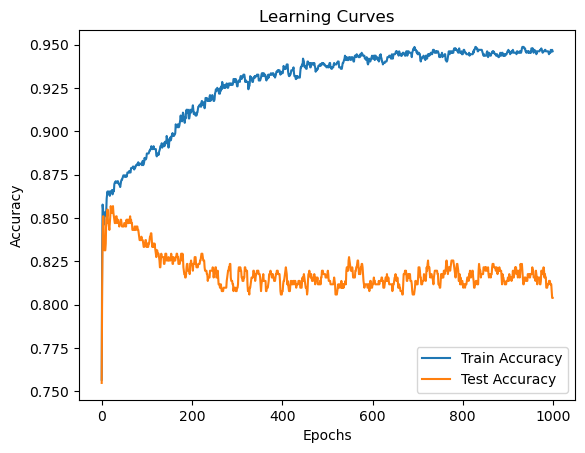

In [120]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize model, loss function, and optimizer
# Assuming FC3Classifier is defined elsewhere
model = FC3Classifier(input_size, hidden_size, output_size, dropout_p)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Initialize lists to store data for plotting
train_accuracy_list = []  
test_accuracy_list = []
epochs_list = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=batch_size, shuffle=True)):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_preds = []
        train_labels = []
        for inputs, targets in DataLoader(train_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            train_preds.extend(preds.squeeze(1).tolist())
            train_labels.extend(targets.tolist())

        cm_train = confusion_matrix(train_labels, train_preds)
        train_accuracy = cm_train.diagonal().sum() / cm_train.sum()
        train_accuracy_list.append(train_accuracy)

        test_preds = []
        test_labels = []
        for inputs, targets in DataLoader(test_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            test_preds.extend(preds.squeeze(1).tolist())
            test_labels.extend(targets.tolist())

        cm_test = confusion_matrix(test_labels, test_preds)
        test_accuracy = cm_test.diagonal().sum() / cm_test.sum()
        test_accuracy_list.append(test_accuracy)
        
    # Store epoch for plotting
    epochs_list.append(epoch)

# Plot learning curves
plt.plot(epochs_list, train_accuracy_list, label='Train Accuracy')
plt.plot(epochs_list, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.savefig("NN_learning curve_epochs.png")
plt.show()


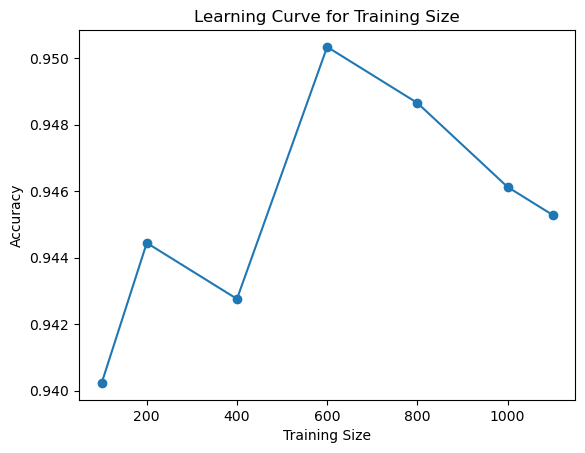

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, Subset 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize model, loss function, and optimizer
# Assuming FC3Classifier is defined elsewhere
model = FC3Classifier(input_size, hidden_size, output_size, dropout_p)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Initialize lists to store data for plotting
train_sizes = [100, 200,400,600,800,1000,1100]  # Example training sizes
train_accuracy_list = []

# Training loop for different training sizes
for train_size in train_sizes:
    # Train dataset should be changed here based on train_size
    train_loader = DataLoader(train_dataset_subset, batch_size=batch_size, shuffle=True)
    
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

    # Calculate accuracy after training
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_preds = []
        train_labels = []
        for inputs, targets in DataLoader(train_dataset, batch_size=batch_size):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            train_preds.extend(preds.squeeze(1).tolist())
            train_labels.extend(targets.tolist())

        cm_train = confusion_matrix(train_labels, train_preds)
        train_accuracy = cm_train.diagonal().sum() / cm_train.sum()
        train_accuracy_list.append(train_accuracy)

# Plot learning curve for training size
plt.plot(train_sizes, train_accuracy_list, marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Training Size')
plt.savefig("NN_learning curve_training size.png")
plt.show()


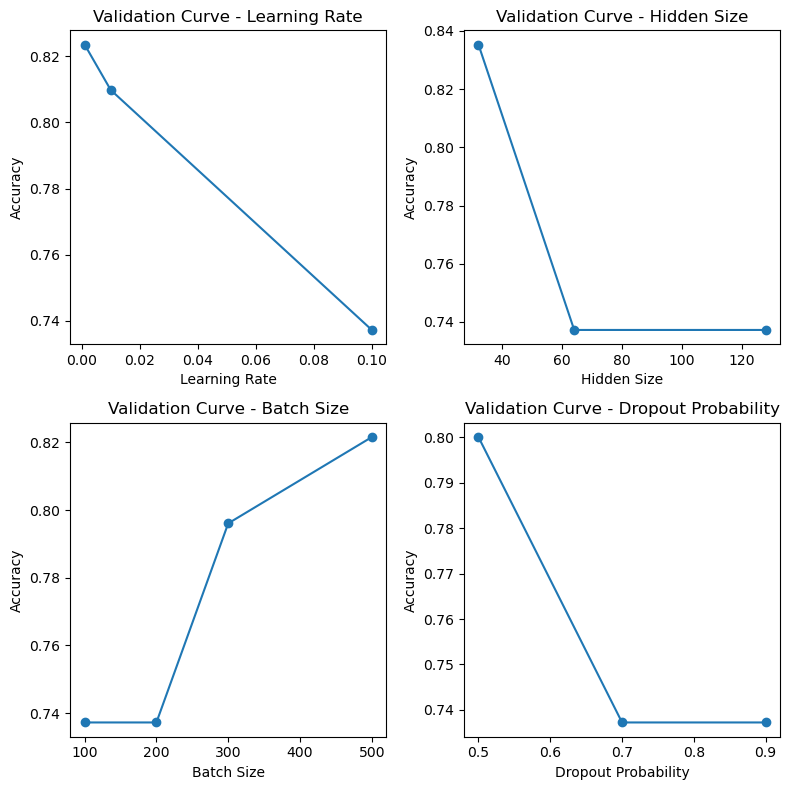

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define hyperparameters to be tested
learning_rates = [0.001, 0.01, 0.1]  # Example learning rates
hidden_sizes = [32, 64, 128]  # Example hidden sizes
batch_sizes = [100, 200,300, 500]  # Example batch sizes
dropout_probs = [0.5, 0.7, 0.9]  # Example dropout probabilities

# Initialize lists to store data for plotting
val_accuracies_lr = []
val_accuracies_hs = []
val_accuracies_bs = []
val_accuracies_dp = []

# Function to train and evaluate model for given hyperparameters
def train_and_evaluate_model(lr, hs, bs, dp):
    # Initialize model, loss function, and optimizer
    model = FC3Classifier(input_size, hs, output_size, dp)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Train the model
    model.train()
    for epoch in range(num_epochs):
        for batch_idx, (inputs, targets) in enumerate(DataLoader(train_dataset, batch_size=bs, shuffle=True)):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        val_preds = []
        val_labels = []
        for inputs, targets in DataLoader(test_dataset, batch_size=bs):
            outputs = model(inputs)
            preds = (outputs > 0.5).float()
            val_preds.extend(preds.squeeze(1).tolist())
            val_labels.extend(targets.tolist())
        
        cm_val = confusion_matrix(val_labels, val_preds)
        val_accuracy = cm_val.diagonal().sum() / cm_val.sum()
        return val_accuracy

# Validation curve for learning rate
for lr in learning_rates:
    val_accuracy = train_and_evaluate_model(lr, hidden_sizes[1], batch_sizes[1], dropout_probs[1])
    val_accuracies_lr.append(val_accuracy)

# Validation curve for hidden size
for hs in hidden_sizes:
    val_accuracy = train_and_evaluate_model(0.05, hs, batch_sizes[1], dropout_probs[1])
    val_accuracies_hs.append(val_accuracy)

# Validation curve for batch size
for bs in batch_sizes:
    val_accuracy = train_and_evaluate_model(0.05, hidden_sizes[1], bs, dropout_probs[1])
    val_accuracies_bs.append(val_accuracy)

# Validation curve for dropout probability
for dp in dropout_probs:
    val_accuracy = train_and_evaluate_model(0.05, hidden_sizes[1], batch_sizes[1], dp)
    val_accuracies_dp.append(val_accuracy)

# Plot validation curves
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.plot(learning_rates, val_accuracies_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Learning Rate')

plt.subplot(2, 2, 2)
plt.plot(hidden_sizes, val_accuracies_hs, marker='o')
plt.xlabel('Hidden Size')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Hidden Size')

plt.subplot(2, 2, 3)
plt.plot(batch_sizes, val_accuracies_bs, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Batch Size')

plt.subplot(2, 2, 4)
plt.plot(dropout_probs, val_accuracies_dp, marker='o')
plt.xlabel('Dropout Probability')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Dropout Probability')

plt.tight_layout()
plt.savefig("NN_validation curves.png")
plt.show()


## NN using scikitlearn

### learning and validation curves

In [24]:
param_range = [(50,), (75,), (100,), (125,), (150,), (175,), (200,)]

In [29]:
[ sum(param_range[i]) for i in range(len(param_range))]

[50, 75, 100, 125, 150, 175, 200]

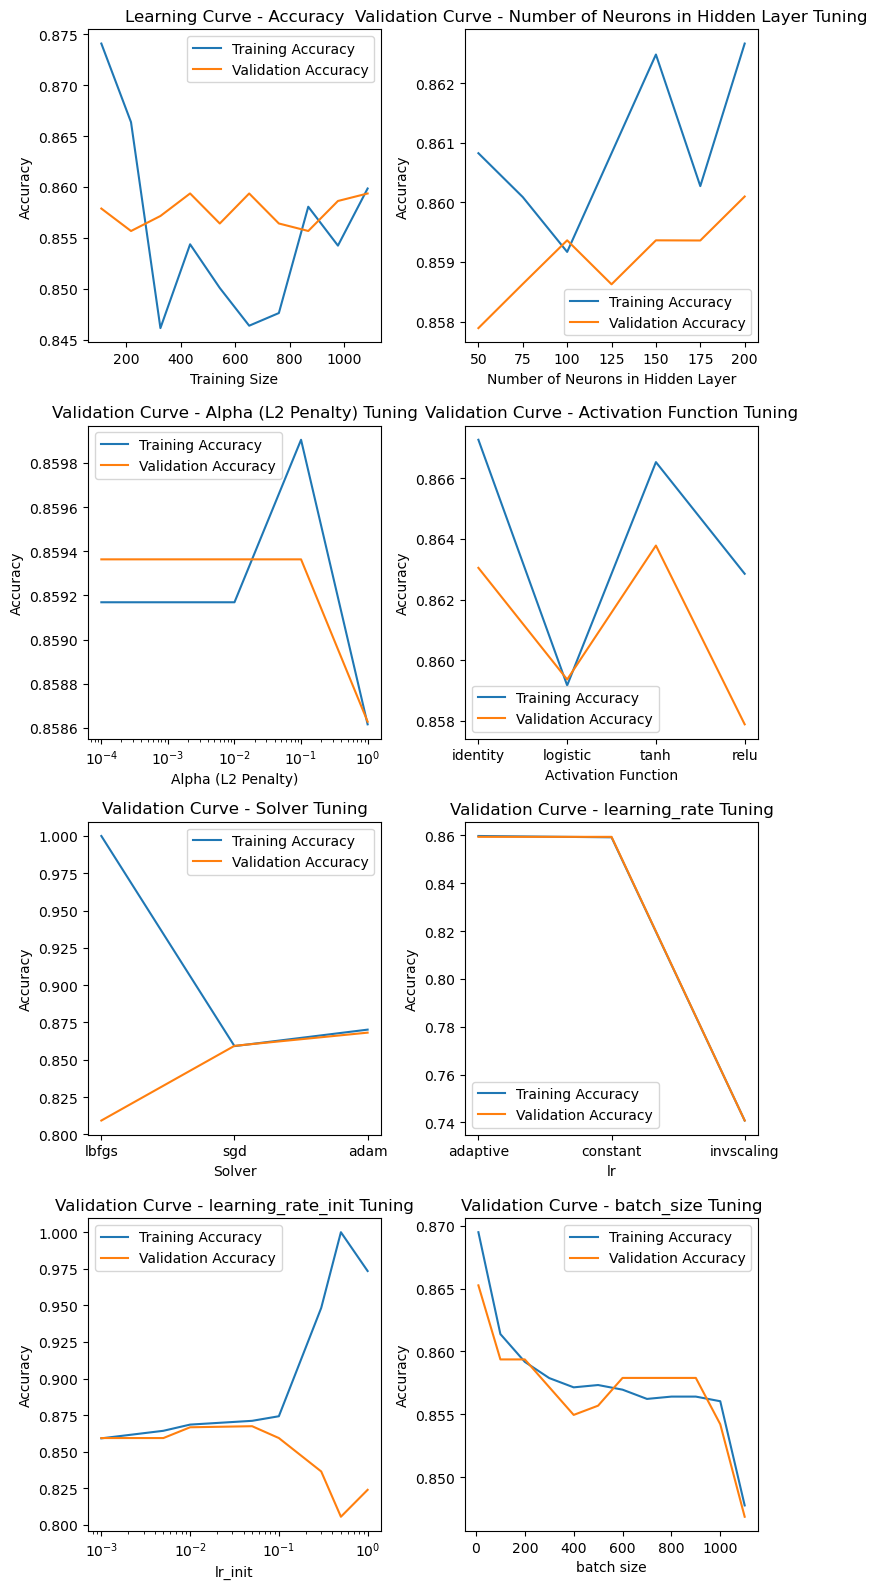

C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\lzowe\AppData\Local\Temp\joblib_memmapping_folder_21252_d7f3d136a050454a80864348c5bf16c6_f67212c5068942e1b2acb136b9956042
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\lzowe\AppData\Local\Temp\joblib_memmapping_folder_21252_e788ce4ac51141d08f98e3973234554b_aeb6d093851b421c8004e2fcd5c316cc
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\lzowe\AppData\Local\Temp\joblib_memmapping_folder_21252_d7f3d136a050454a80864348c5bf16c6_43a76e1e5e35481380b1bf0434d4e306
  warnings.warn("Failed to delete tempo

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', max_iter=1000, random_state=42)

# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(8, 16))
plt.subplot(4, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Validation curve: Number of neurons in the hidden layer tuning
param_range = [(50,), (75,), (100,), (125,), (150,), (175,), (200,)]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='hidden_layer_sizes', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for number of neurons in the hidden layer tuning
plt.subplot(4, 2, 2)
plt.plot([ sum(param_range[i]) for i in range(len(param_range))], np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot([ sum(param_range[i]) for i in range(len(param_range))], np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Number of Neurons in Hidden Layer Tuning')
plt.legend()

# Validation curve: Alpha (L2 penalty) tuning
param_range = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='alpha', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for alpha tuning
plt.subplot(4, 2, 3)
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Alpha (L2 Penalty)')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Alpha (L2 Penalty) Tuning')
plt.legend()

# Validation curve: Activation function tuning
param_range = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='activation', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for activation function tuning
plt.subplot(4, 2, 4)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Activation Function Tuning')
plt.legend()

# Validation curve: Solver tuning
param_range = ['lbfgs', 'sgd', 'adam']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='solver', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for solver tuning
plt.subplot(4, 2, 5)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Solver Tuning')
plt.legend()

# Validation curve: Solver tuning
param_range = ['adaptive','constant', 'invscaling']
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='learning_rate', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for solver tuning
plt.subplot(4, 2, 6)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('lr')
plt.ylabel('Accuracy')
plt.title('Validation Curve - learning_rate Tuning')
plt.legend()

# Validation curve: Solver tuning
param_range = [0.001,0.005,0.01,0.05,0.1,0.3,0.5,1]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='learning_rate_init', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for solver tuning
plt.subplot(4, 2, 7)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale("log")
plt.xlabel('lr_init')
plt.ylabel('Accuracy')
plt.title('Validation Curve - learning_rate_init Tuning')
plt.legend()


# Validation curve: batch_size tuning
param_range = [10,100,200,300,400,500,600,700,800,900,1000,1100]
train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='batch_size', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for solver tuning
plt.subplot(4, 2, 8)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('batch size')
plt.ylabel('Accuracy')
plt.title('Validation Curve - batch_size Tuning')
plt.legend()


plt.tight_layout()
plt.savefig('MLP_curves.png')
plt.show()


### gridsearch

C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization has

Best Hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (150,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}
MLP GridSearchCV model saved successfully as: mlp_grid_search_model.pkl

Confusion Matrix:
[[239  16]
 [ 36  49]]


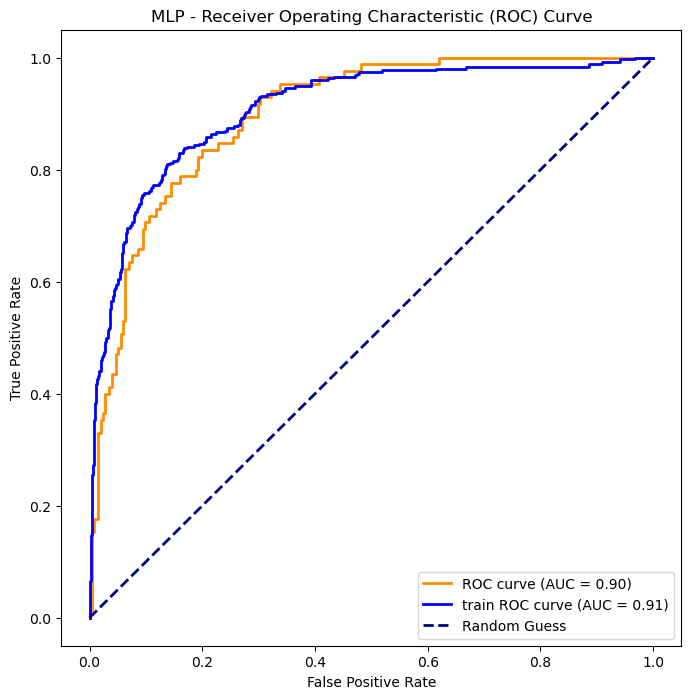

Test AUC: 0.90
Train AUC: 0.91
Test Accuracy:  0.85
Train Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       255
           1       0.75      0.58      0.65        85

    accuracy                           0.85       340
   macro avg       0.81      0.76      0.78       340
weighted avg       0.84      0.85      0.84       340



In [31]:
import pickle
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Define hyperparameter grids for the model
param_grid = {
    'hidden_layer_sizes': [(75,), (100,),(150,) ],
    'activation': ['logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [  0.01, 0.1,1 ],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.01,0.05,0.1],
    'batch_size': [10,100,200,600,800],
}

# Set up MLP model
model = MLPClassifier(max_iter=1000, random_state=42)

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Save the model to disk using pickle
model_file_path = 'mlp_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("MLP GridSearchCV model saved successfully as:", model_file_path)

# Predictions on the test set
y_pred = grid_search.predict(X_test_scaled)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the probability scores for ROC curve
y_prob = grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Train AUC
y_prob_train = grid_search.predict_proba(X_train_scaled)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("MLP_ROC.png")
plt.show()

# Print AUC
print('Test AUC: {:.2f}'.format(roc_auc))
print('Train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy:  {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)

### loss curve

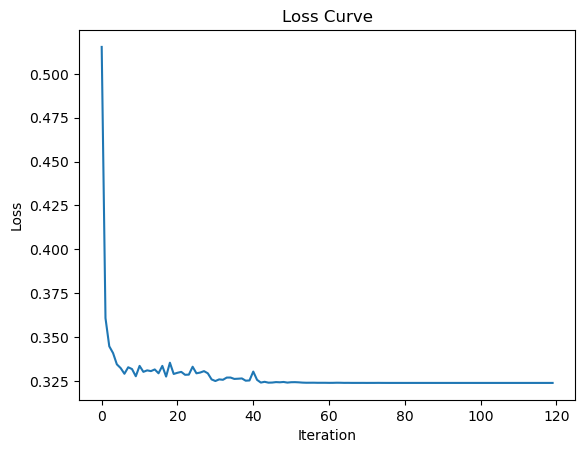

In [32]:
# Extract loss curve
loss_curve = grid_search.best_estimator_.loss_curve_

# Plot loss curve
plt.plot(loss_curve)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.savefig("nn_loss_curve.png")
plt.show()

### time vs training size

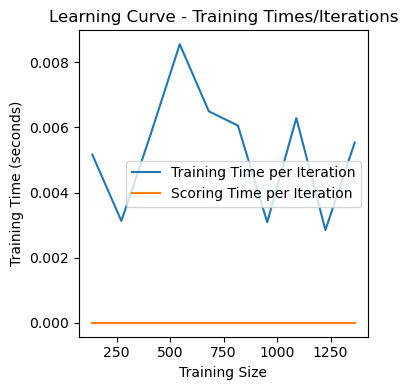

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', max_iter=1000, random_state=42)


# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(4,4))
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()
plt.tight_layout()
plt.savefig('NNs_time_curves.png')
plt.show()
